In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
%matplotlib inline

In [2]:
df= pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.shape

(167, 10)

In [4]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
#Checking null values
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

No null values

# Data Transformation

In the dataframe(cntry_df) provided, imports,exports and health features have the percentage of money spent or gained from these sectors from the total gdpp which is not clear. So, to avoid this, values in imports, exports and health are converted to absolute values

In [7]:
for i in ['imports','exports','health']:
    df[i] = (df[i]*df['gdpp'])/100
    

In [8]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [9]:
df1=df.iloc[:,1:10]  
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


<AxesSubplot:>

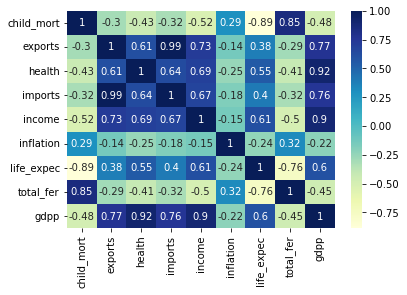

In [10]:
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")

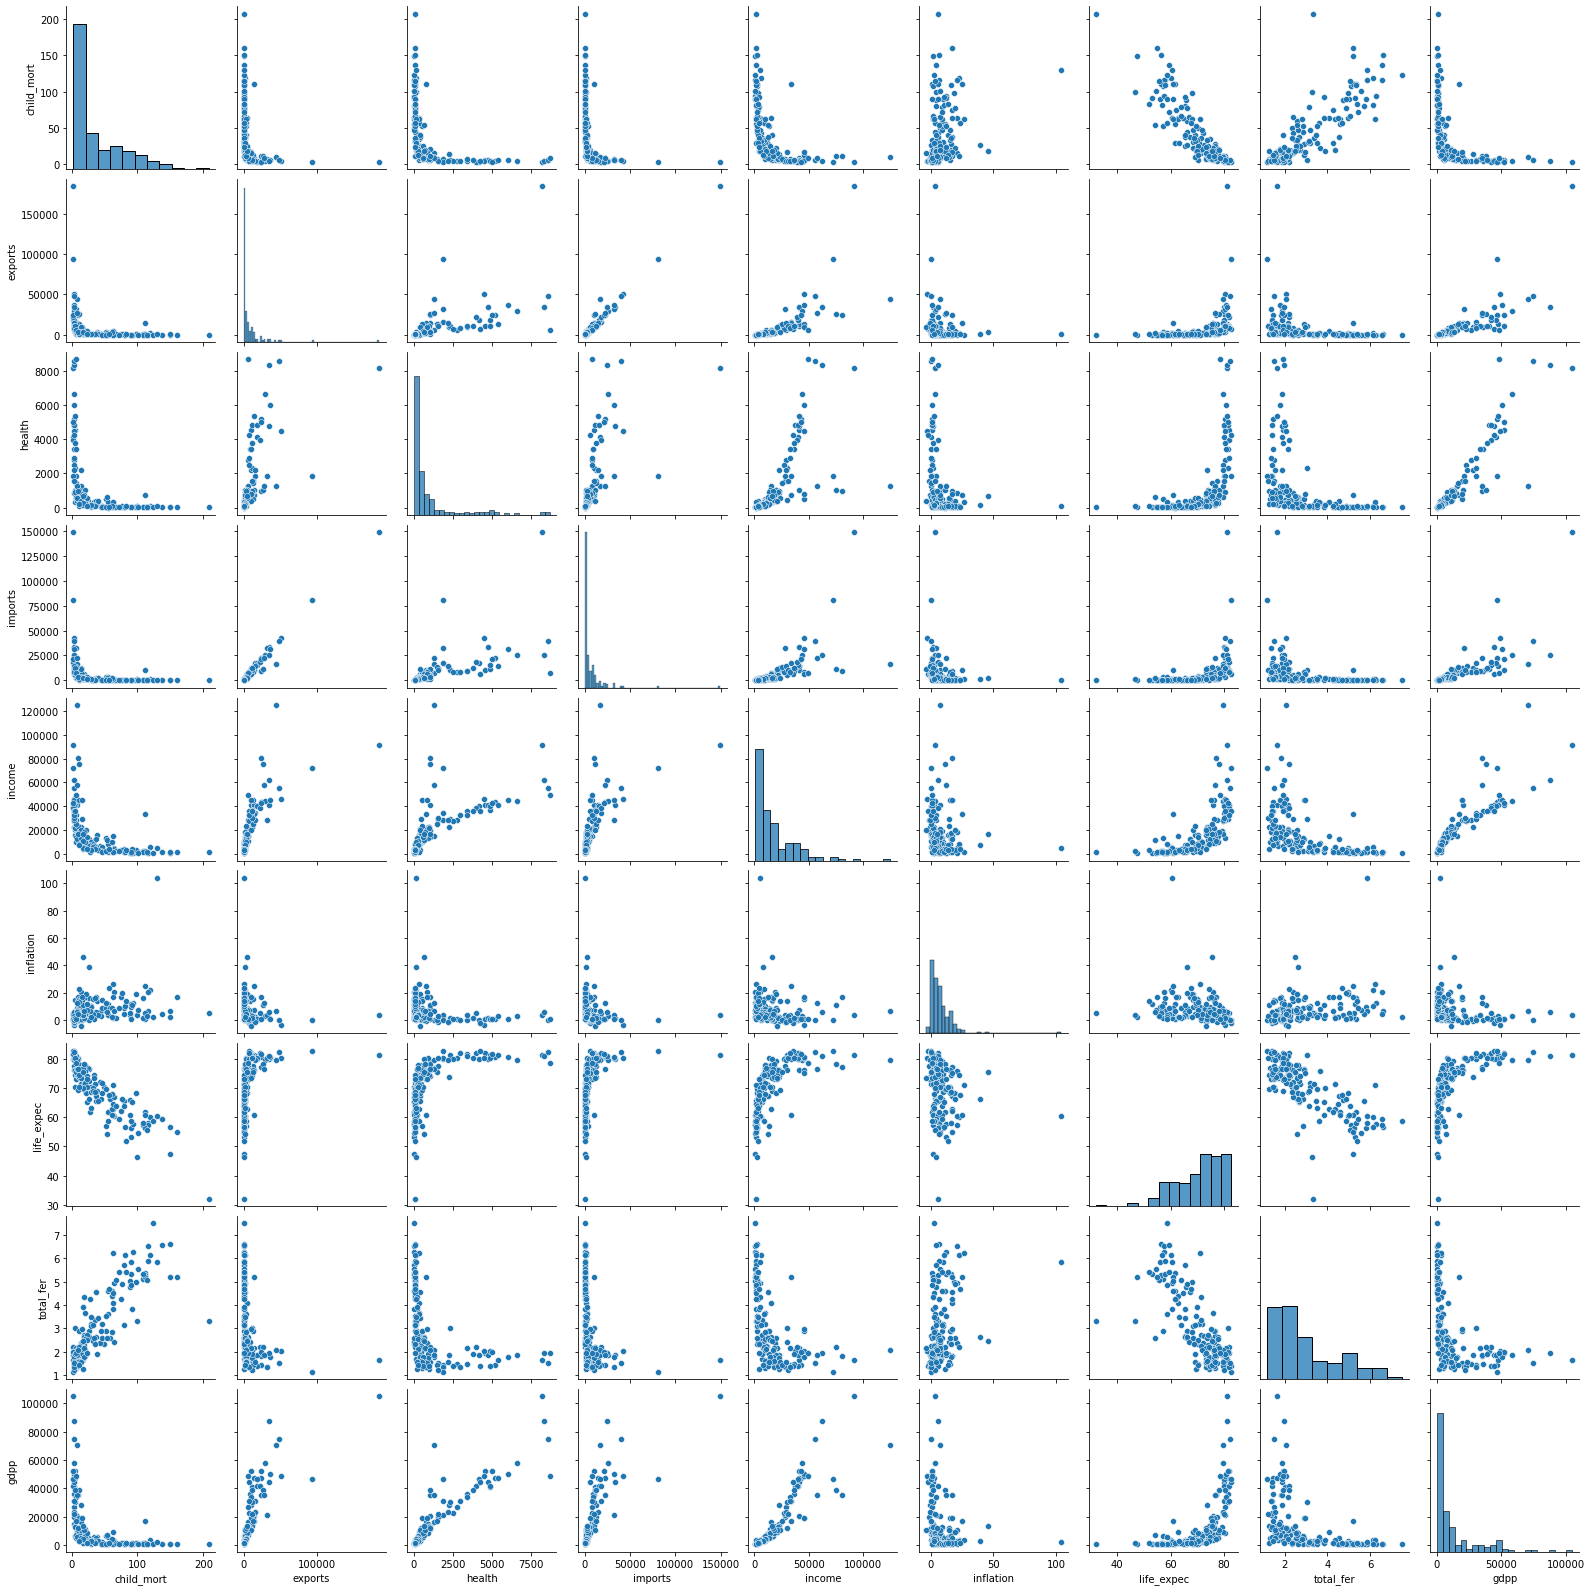

In [11]:
sns.pairplot(df1)

# Checking for outliers

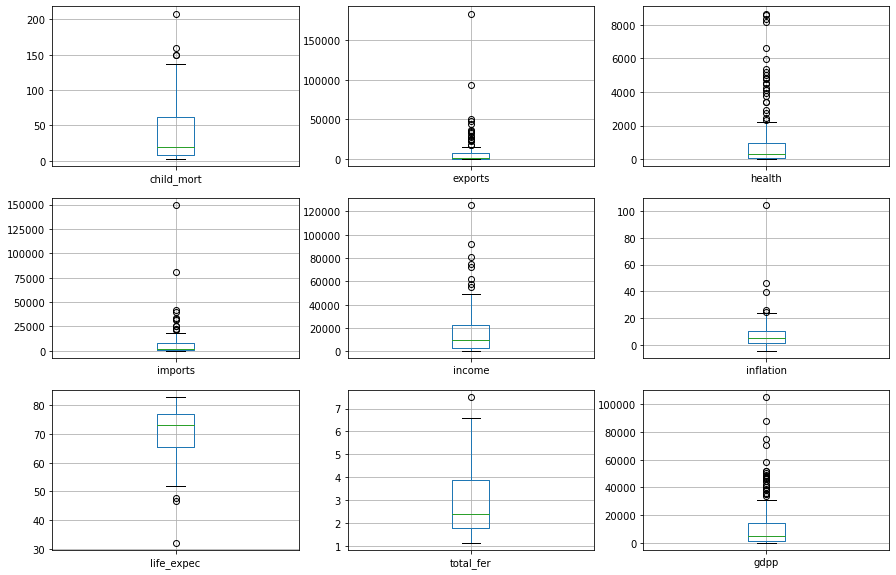

In [12]:
fig = plt.figure(figsize=(15,10))
a=3
b=3
c=1
for i in df1.columns:
    plt.subplot(a,b,c)
    df.boxplot([i])
    c=c+1
    

In [13]:
#Handling Outliers
df1_capped = df1.copy()
cap_outliers = ['exports', 'health', 'imports', 'income', 'gdpp', 'inflation']

In [14]:
for i, var in enumerate(cap_outliers):
    q4 = df1[var].quantile(0.95)
    df1_capped[var][df1_capped[var]>=q4] = q4

In [16]:
df1_capped.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,5783.114656,954.012480,5140.089474,15738.760479,6.929317,70.555689,2.947964,11998.826347
std,40.328931,8580.053847,1453.426636,6696.210005,14787.154215,6.384357,8.893172,1.513848,15158.213199
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,82.800000,7.490000,48610.000000


In [17]:
#Scaling the Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit_transform
scaled_data = pd.DataFrame(scaler.fit_transform(df1))

scaled_data.head()

,0,1,2,3,4,5,6,7,8
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


# K means Clustering

In [18]:
#Elbow method to find the number of clusters
from sklearn.cluster import KMeans
clusters=list(range(2,8))
inertia = []
for k in clusters:
    model = KMeans(n_clusters = k, max_iter=150,random_state= 50)
    model.fit(scaled_data)
    inertia.append(model.inertia_)

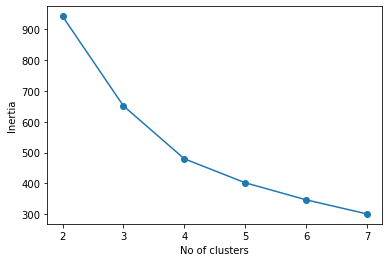

In [19]:
plt.plot(clusters,inertia,'-o')
plt.xlabel("No of clusters")
plt.ylabel("Inertia")
plt.show()

According to the graph, we can take optimum value of k as 3

In [20]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(scaled_data) 
print(y_kmeans)

[1 0 0 1 0 0 0 2 2 0 0 0 0 0 0 2 0 1 0 0 0 1 0 2 0 1 1 0 1 2 0 1 1 0 0 0 1
 1 1 0 1 0 2 0 2 0 0 0 0 1 1 0 0 2 2 1 1 0 2 1 0 0 0 1 1 0 1 0 2 0 0 0 1 2
 0 2 0 2 0 0 1 1 2 0 1 0 0 1 1 0 0 2 0 1 1 0 0 1 2 1 0 0 0 0 0 0 1 0 1 0 2
 2 1 1 2 0 1 0 0 0 0 0 0 2 0 0 1 0 0 1 0 0 1 2 0 0 1 1 0 2 0 0 1 0 2 2 0 1
 0 1 1 0 0 0 0 1 0 2 2 2 0 0 0 0 0 1 1]


In [21]:
#Checking the efficiency of the model by Silhoutte score
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(scaled_data,kmeans.labels_, metric='euclidean',random_state=42)
print('Silhouette Score:', sil_score)

Silhouette Score: 0.4218615812599681


# Heirachical Agglomerative clustering

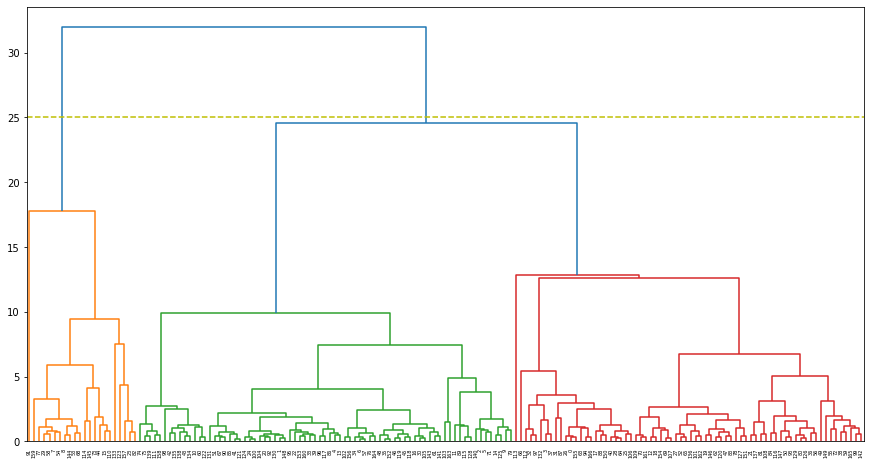

In [22]:
from scipy.cluster.hierarchy import dendrogram,linkage
denlink=linkage(scaled_data,method='ward')
plt.figure(figsize=(15,8))
dendrogram(denlink,orientation='top',distance_sort='ascending',show_leaf_counts=True)
plt.hlines(25,0,5000,colors='y',linestyles='dashed' )
plt.show()

In [23]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
labels=cluster.fit_predict(scaled_data)
labels

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 2, 0, 2, 1, 1, 1, 2, 1,
       2, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2,
       0, 2, 2, 1, 2, 1, 1, 2, 1, 0, 0, 1, 1, 2, 0, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 0, 1, 1, 2, 1, 0, 2, 2, 2, 0, 1, 2, 1, 1, 0, 1, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1,
       0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 1, 2, 2, 0, 2, 2, 1, 1, 2, 1, 2, 2,
       1, 0, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 0, 0, 1, 1, 2, 1, 1, 1, 2, 2,
       1, 1, 2, 0, 2, 0, 2, 1, 1, 2, 2, 1, 1], dtype=int64)

In [25]:
from sklearn.metrics import silhouette_score

sil_score2 = silhouette_score(scaled_data,labels,metric='euclidean',random_state=42)

print('Silhouette Score: ' ,sil_score2)

Silhouette Score:  0.3493641558276202


So Kmeans has good Silhouette Score

# Kmeans clustering with number of clusters=3 

In [26]:
df1['cluster_no']=kmeans.labels_
df['cluster_no']=kmeans.labels_

In [27]:
df1.head(11)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_no
0,90.2,55.30,41.9174,248.297,1610,9.440,56.2,5.82,553,1
1,16.6,1145.20,267.8950,1987.740,9930,4.490,76.3,1.65,4090,0
2,27.3,1712.64,185.9820,1400.440,12900,16.100,76.5,2.89,4460,0
3,119.0,2199.19,100.6050,1514.370,5900,22.400,60.1,6.16,3530,1
4,10.3,5551.00,735.6600,7185.800,19100,1.440,76.8,2.13,12200,0
5,14.5,1946.70,834.3000,1648.000,18700,20.900,75.8,2.37,10300,0
6,18.1,669.76,141.6800,1458.660,6700,7.770,73.3,1.69,3220,0
7,4.8,10276.20,4530.8700,10847.100,41400,1.160,82.0,1.93,51900,2
8,4.3,24059.70,5159.0000,22418.200,43200,0.873,80.5,1.44,46900,2
9,39.2,3171.12,343.3920,1208.880,16000,13.800,69.1,1.92,5840,0


In [28]:
df1_new =  df1.groupby(['cluster_no']).mean()
df1_new

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_no,,,,,,,,,
0,20.357143,3604.149434,547.279455,3710.446386,13968.021978,7.070549,73.460440,2.235055,7979.912088
1,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333
2,5.046429,31038.239286,4327.163214,25818.100000,50178.571429,3.014679,80.514286,1.760714,48114.285714


In [29]:
df1_new['No of countries']=df.groupby('cluster_no')['country'].count()
df1_new

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,No of countries
cluster_no,,,,,,,,,,
0,20.357143,3604.149434,547.279455,3710.446386,13968.021978,7.070549,73.460440,2.235055,7979.912088,91
1,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333,48
2,5.046429,31038.239286,4327.163214,25818.100000,50178.571429,3.014679,80.514286,1.760714,48114.285714,28


In [30]:
df1_new['Contries_Pro']=round(df1_new['No of countries']/df1_new['No of countries'].sum(),2)
df1_new

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,No of countries,Contries_Pro
cluster_no,,,,,,,,,,,
0,20.357143,3604.149434,547.279455,3710.446386,13968.021978,7.070549,73.460440,2.235055,7979.912088,91,0.54
1,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333,48,0.29
2,5.046429,31038.239286,4327.163214,25818.100000,50178.571429,3.014679,80.514286,1.760714,48114.285714,28,0.17


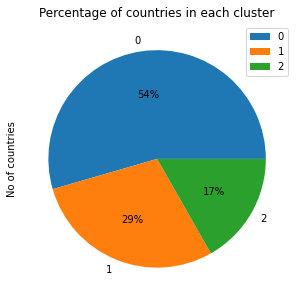

In [32]:
df1_new.plot.pie(y='No of countries', figsize=(5,5),autopct='%1.0f%%',title='Percentage of countries in each cluster')
plt.show()

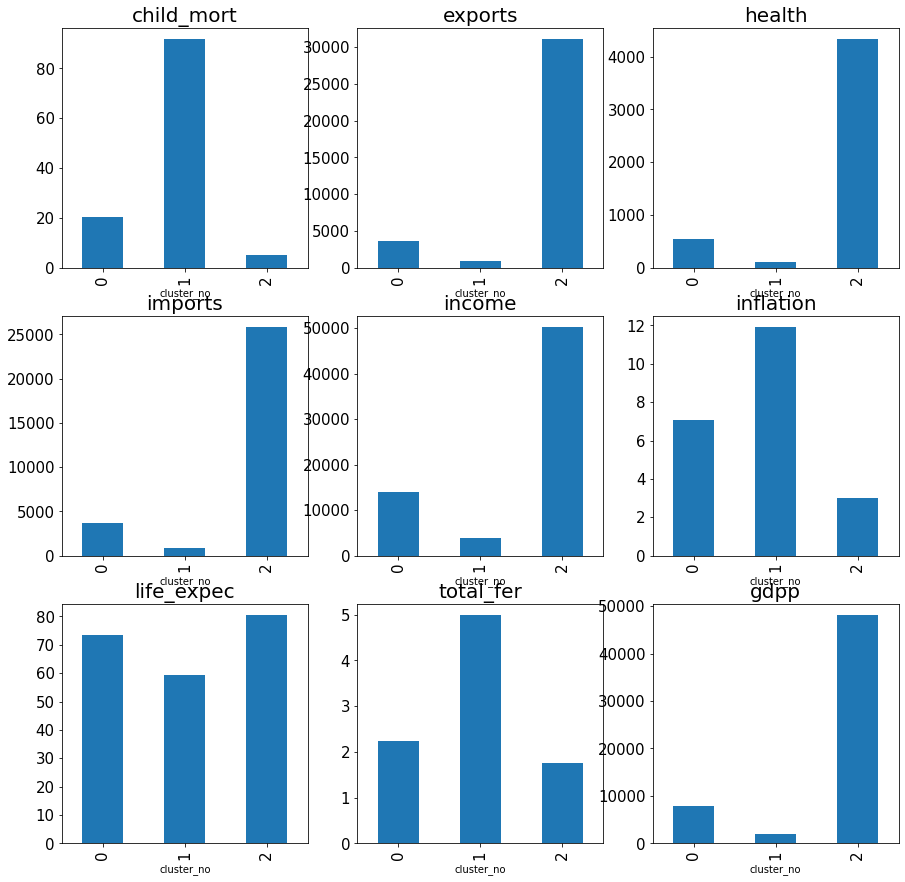

In [34]:
df1_g=df1_new.copy() 
df1_g.drop(['No of countries','Contries_Pro'], axis = 1, inplace = True)
a = 3  
b = 3  
c = 1 

fig = plt.figure(figsize=(15,15))

for i in df1_g.columns:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i),fontsize=20)
    df1_g[i].plot(kind='bar', fontsize=15)
    c = c + 1


plt.show()

From the above graphs,we can understand that:

Cluster 0 has highest child mortality,Lowest income,Lowest GDP,Lowest health expenditure,The highest inflation,Compartively low life expectancy,Highest total fertility

Cluster 2 has Lowest child mortality,Highest income,Highest GDP,Highest health spending,The Lowest inflation,high life expectancy,Lowest total fertility

Cluster 1 is Placed in between Cluster 0 & 1

Therefore,
Cluster 0 represents Under developed countries

Cluster 1 represents Developing countries

Cluster 2 represents Developed countries

# Inference

cluster 0 (Under developed countries) should be considered for NGO aid



In [36]:
cluster0=df[df['cluster_no']==0]
cluster0.sort_values(['gdpp','income','child_mort','health','inflation','life_expec','total_fer','imports','exports'], 
                      ascending=[True,True,False,True,False,True,False,False,True])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_no
109,Nepal,47.0,56.7136,31.0800,215.488,1990,15.100,68.3,2.61,592,0
146,Tajikistan,52.4,109.9620,44.1324,432.468,2110,12.500,69.6,3.51,738,0
12,Bangladesh,49.4,121.2800,26.6816,165.244,2440,7.140,70.4,2.33,758,0
27,Cambodia,44.4,425.2260,44.6448,467.670,2520,3.120,66.1,2.88,786,0
83,Kyrgyz Republic,29.6,454.0800,54.3840,718.960,2790,10.000,68.5,3.10,880,0
...,...,...,...,...,...,...,...,...,...,...,...
122,Portugal,3.9,6727.5000,2475.0000,8415.000,27200,0.643,79.8,1.39,22500,0
135,Slovenia,3.2,15046.2000,2201.9400,14718.600,28700,-0.987,79.5,1.57,23400,0
60,Greece,3.9,5944.9000,2770.7000,8258.300,28700,0.673,80.4,1.48,26900,0
10,Bahamas,13.8,9800.0000,2209.2000,12236.000,22900,-0.393,73.8,1.86,28000,0


In [37]:
cluster0=df[df['cluster_no']==0]
cluster0.sort_values(['gdpp','income','child_mort','health','inflation','life_expec','total_fer','imports','exports'], 
                      ascending=[True,True,False,True,False,True,False,False,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_no
109,Nepal,47.0,56.71360,31.0800,215.488000,1990,15.10,68.3,2.61,592,0
146,Tajikistan,52.4,109.96200,44.1324,432.468000,2110,12.50,69.6,3.51,738,0
12,Bangladesh,49.4,121.28000,26.6816,165.244000,2440,7.14,70.4,2.33,758,0
27,Cambodia,44.4,425.22600,44.6448,467.670000,2520,3.12,66.1,2.88,786,0
83,Kyrgyz Republic,29.6,454.08000,54.3840,718.960000,2790,10.00,68.5,3.10,880,0
107,Myanmar,64.4,1.07692,19.4636,0.651092,3720,7.04,66.8,2.41,988,0
164,Vietnam,23.3,943.20000,89.6040,1050.620000,4490,12.10,73.1,1.95,1310,0
69,India,58.8,305.10000,54.6750,365.850000,4410,8.98,66.2,2.60,1350,0
161,Uzbekistan,36.3,437.46000,80.1780,393.300000,4240,16.50,68.8,2.34,1380,0
102,Moldova,17.2,638.96000,190.7100,1279.550000,3910,11.10,69.7,1.27,1630,0


These are the 10 countries which are in dire need of Financial aid